# Effect of Linear Regression on stock market prediction

In this notebook we will take a look solely at linear regression and its accurracy when predicting stock market fluctuation

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Testing only with one stock
ticker =  "AMZN"
today = date.today()

amzn = yf.download(ticker, start = "2020-01-01", end = date.today() )
# amzn.reset_index(inplace=True) # To reset the index because otherwise our date would be the index of the DataFrame


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
print(amzn.shape)
display(amzn.head())
display(amzn.describe())

# Verifying there are no null or na values
print(f"NA Sum: \n{amzn.isna().sum()}\n")
print(f"Null Sum: \n{amzn.isnull().sum()}")

(1315, 5)


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,1315.000000,1315.000000,1315.000000,1315.000000,1.315000e+03
mean,149.811235,151.665719,147.886330,149.847944,6.723861e+07
std,34.663354,34.821846,34.490100,34.732825,3.387688e+07
min,81.820000,83.480003,81.301498,82.075500,1.500750e+07
25%,122.343498,123.858250,120.629997,122.445499,4.467150e+07
50%,155.210007,157.477997,153.699997,155.660004,5.914400e+07
75%,172.373497,174.380501,170.955002,172.764999,7.999200e+07
max,242.059998,242.520004,238.029999,239.020004,3.113460e+08


NA Sum: 
Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64

Null Sum: 
Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64


In [4]:
# Adding features that could be relevant to the model

amzn['SMA_5'] = amzn['Close'].rolling(window = 5).mean()
amzn['EMA_5'] = amzn['Close'].ewm(span = 5, adjust = False).mean()
amzn['MACD'] = amzn['Close'].rolling(window = 12).mean() - amzn['Close'].rolling(window = 26).mean()
amzn['Return'] = amzn['Close'].pct_change()
amzn['Volatility_5'] = amzn['Close'].rolling(window = 5).std()
amzn['Target'] = amzn['Close'].shift(-1)

amzn.head(10)

Price,Close,High,Low,Open,Volume,SMA_5,EMA_5,MACD,Return,Volatility_5,Target
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,,,,
Date,,,,,,,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000,NaN,94.900497,NaN,NaN,NaN,93.748497
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000,NaN,94.516497,NaN,-0.012139,NaN,95.143997
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000,NaN,94.725664,NaN,0.014886,NaN,95.343002
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000,NaN,94.931443,NaN,0.002092,NaN,94.598503
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000,94.746899,94.820463,NaN,-0.007809,0.623588,95.052498
2020-01-09,95.052498,95.890999,94.790001,95.494499,63346000,94.777299,94.897808,NaN,0.004799,0.636519,94.157997
2020-01-10,94.157997,95.347000,94.000000,95.268501,57074000,94.859200,94.651204,NaN,-0.009411,0.477542,94.565002
2020-01-13,94.565002,94.900002,94.040001,94.565498,55616000,94.743401,94.622470,NaN,0.004323,0.461135,93.472000


In [5]:
amzn.dropna(inplace = True)
amzn.head()

Price,Close,High,Low,Open,Volume,SMA_5,EMA_5,MACD,Return,Volatility_5,Target
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,,,,
Date,,,,,,,,,,,
2020-02-07,103.963997,104.926498,101.904999,102.099503,101906000,102.232498,101.847784,1.697608,0.014169,1.349681,106.695503
2020-02-10,106.695503,106.779999,104.248001,104.250504,101124000,103.529599,103.463691,2.282830,0.026274,1.917167,107.540001
2020-02-11,107.540001,109.297501,106.800003,107.544998,114920000,104.540900,104.822461,2.957221,0.007915,2.478783,108.000000
2020-02-12,108.000000,109.012497,107.764503,108.160004,66686000,105.742200,105.881641,3.844676,0.004277,2.389455,107.493500
2020-02-13,107.493500,108.514000,107.099998,107.249496,60636000,106.738600,106.418927,4.613266,-0.004690,1.620457,106.743500


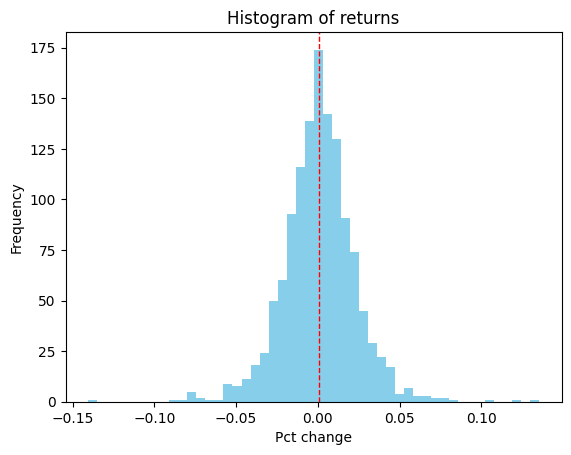

In [6]:
# Plotting the pct_change

plt.hist(amzn['Return'], bins = 50, color = 'skyblue')
plt.xlabel("Pct change")
plt.ylabel("Frequency")
plt.title("Histogram of returns")
plt.axvline(amzn['Return'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {amzn['Return'].mean():.2f}')
plt.show()

In [7]:
# Separating data into test and train

split_value = 0.8
split_idx = int(split_value * len(amzn))
features = ['Close', 'SMA_5', 'EMA_5', 'MACD', 'Return', 'Volatility_5']


X_train = amzn[features].iloc[:split_idx]
X_test = amzn[features].iloc[split_idx:]

y_train = amzn['Target'].iloc[:split_idx]
y_test = amzn['Target'].iloc[split_idx:]

In [8]:
print(len(amzn))
print(int(len(amzn)*.8))
print(int(len(amzn)*.8*.6))


1289
1031
618


In [9]:
# Training the model

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Evaluating the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)

12.089089781040936


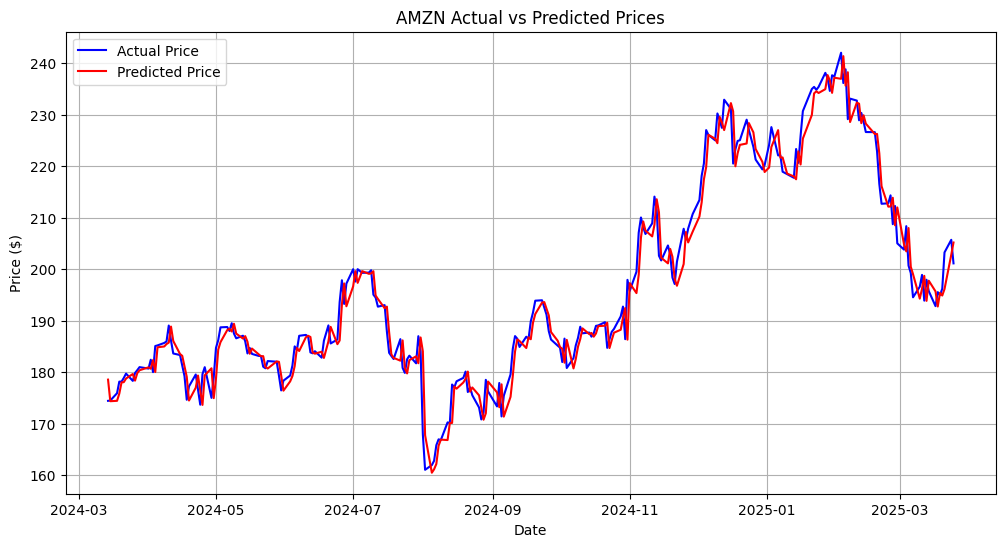

In [11]:
# Plotting the predictions

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = "Actual Price", color = "blue")
plt.plot(y_test.index, y_pred, label = "Predicted Price", color = "red")
plt.title(f"{ticker} Actual vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

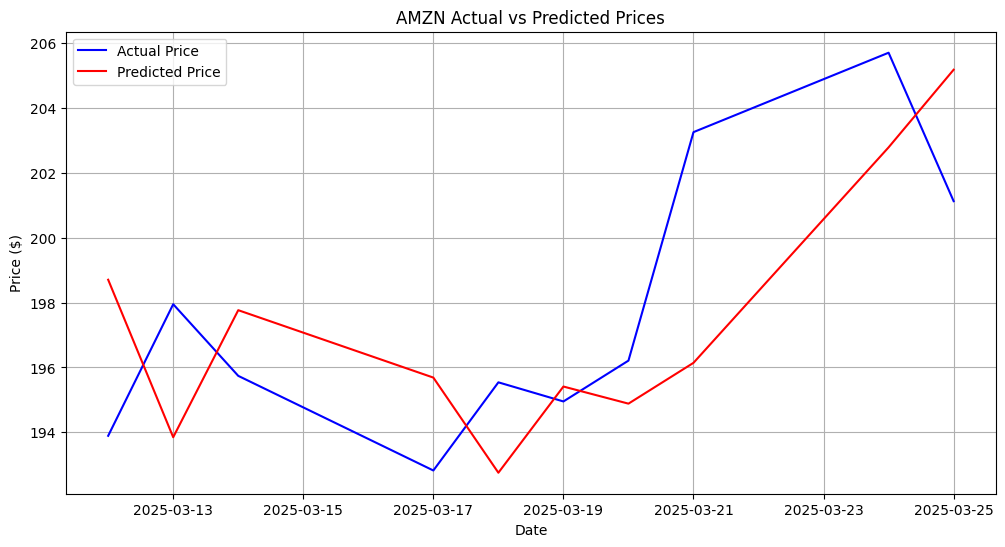

In [12]:
# Last 10 days
plt.figure(figsize=(12,6))
plt.plot(y_test.index[-10:], y_test[-10:], label = "Actual Price", color = "blue")
plt.plot(y_test.index[-10:], y_pred[-10:], label = "Predicted Price", color = "red")
plt.title(f"{ticker} Actual vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print(f"The RMSE of this model is {np.sqrt(mse):.2f}")
print(f"The R2-score of this model is {r2:.2f}")

training_pred = model.predict(X_train)
training_mse = mean_squared_error(y_train, training_pred)
print(f"\nThe RMSE of the trianing data is {np.sqrt(training_mse):.2f}")

The RMSE of this model is 3.48
The R2-score of this model is 0.97

The RMSE of the trianing data is 3.11
